# ПР2: Задачи CV (Computer Vision). Создание приложения для создания субтитров к изображениям

Здесь мы используем библиотеку **Transformers**, с которой вы познакомились в предыдущей практической работе. Она предоставляет API и простые инструменты для загрузки и использования предобученных моделей с ресурса [Hugging Face](https://huggingface.co/models).

- Оффициальная документация Transformers: https://huggingface.co/docs/transformers/main/en/index
- Описание и пример использования на Хабре: https://habr.com/ru/articles/704592/ 


**CV (Computer Vision)**, или *машинное зрение*, — это область искусственного интеллекта, которая занимается разработкой алгоритмов и методов, позволяющих компьютерам "видеть" и интерпретировать изображения и видео. Основная задача компьютерного зрения — автоматическое извлечение полезной информации из визуальных данных, например, распознавание объектов, определение их местоположения или анализ сцен. Это может включать такие приложения, как автоматизация вождения, распознавание лиц и обработка медицинских изображений.

## 1/ Подготовка среды выполнения
На данной этапе вам наобходимо подготовить виртуальное окружение и установить все необходимые библиотеки.

1. Создать и активировать (или только активировать, если ранне создавали) виртуальной окружение `python`.

В терминале вводим следующие команды команды:

*создаем виртуальное окружение с помощью `python-venv`*
```
python -m venv env
```
*активируем виртуальное окружение*
```
env\Scripts\activate
```
**Примечание.** `env` - это название вашего виртуального окружения, назвать его можете как угодно.

После этого можем выбрать наш локальный интерпрететор pyhton, нажав на кнопку выше "Select kernel".

2. Устанавливаем все необходимые библиотеки

**Примечание.** Библиотеки установятся в ваше виртуальное окружение.

Нам понадобиться библиотека Transformers и PyTorch:

```
pip install transformers
pip install torch
```
Библиотека Gradio для создания web-приложения.
```
pip install gradio
```
Также для работы с изображение нам потребуется библиотека PIL (Python Image Library) `Pillow`
```
pip install Pillow
```

## 2/ Пошаговое тестирование идеи

Прежде чем создать итоговое приложение необходимо проверить те идеи и концепции, которые вы закладываете в ИИ-приложение. Интерфейс Jupyter Notebook как нельзя кстати подходит для этой задачи, выступая в роли некой "песочницы".

**Сперва необходмо определиться с какой предобученной моделью мы работает.** В данной лабораторной работе в качестве примера предлагается выполнить задачу описания изображения - **Imgae-to-Text** с помощью одной из предобученных NLP-моделей глубокого обучения с Hugging Face https://huggingface.co/models. Сортируем модели по тегу **Imgae-to-Text**. Вывалиться список моделей для данной задачи. Для примера выберем популярную на данный момент `Salesforce/blip-image-captioning-large`. Страница с описанием и примером кода https://huggingface.co/Salesforce/blip-image-captioning-large. 

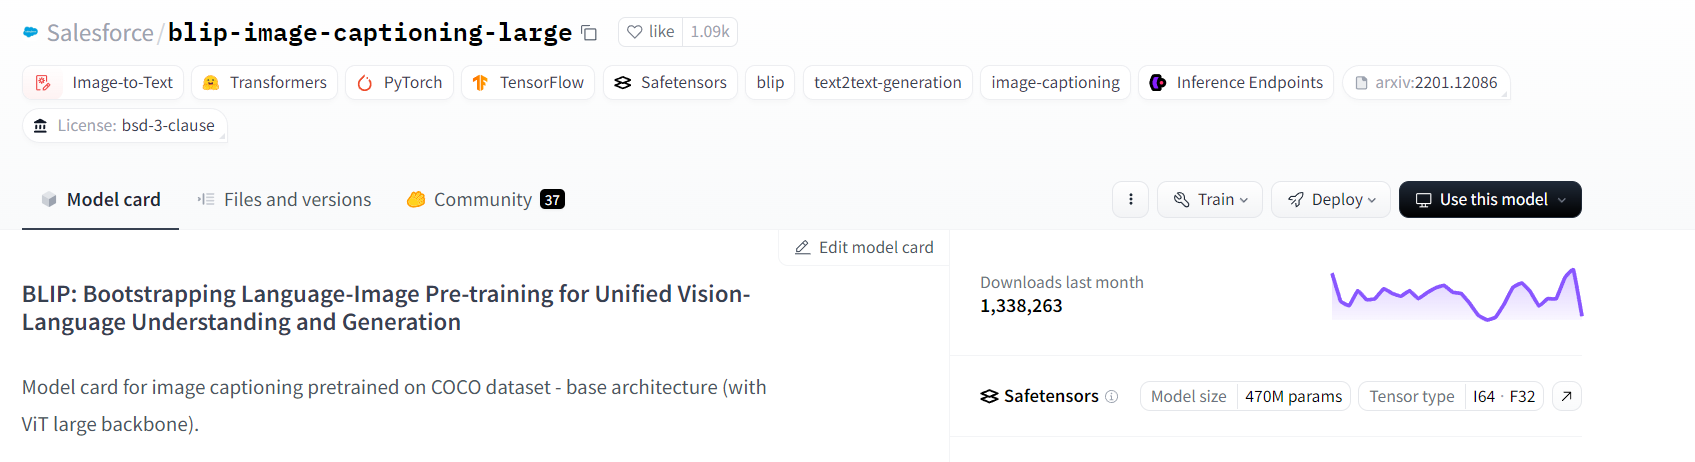

Нажимая на кнопку "Use this model" мы увидим код для встраивания через интерфейс `pileline` библиотеки Transformers. Напомним,  что библиотека `transformers` содержит интерфейс `pipeline`, позволяющий сразу использовать модель на заданных входных данных. Это конвеййр, скрывающий под собой процесс загрузки и подготовки модели. Выглядит все очень просто!

Первым делом импортируем все необходимые библиотеки. Нам также понадобится библиотека `Pillow` для работы с изображением и `requests` для загрузки изображения по URL.

In [51]:
from transformers import pipeline
import gradio as gr
from PIL import Image
import requests

Загрузим выбранную модель. Укажем параметр `max_new_tokens=200` чтобы получать не слишком короткое текстовое описание изображения.

In [ ]:
pipe_img = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large", max_new_tokens=300)

Загрузим тестовое изображение. В качестве примера возьмем изображение горы Эребор из фильма "Хоббит". Скопируем URL на изображение.

In [14]:
image_url = "https://i.pinimg.com/originals/ce/6e/d4/ce6ed49245e41ae443ed20ce1e504297.jpg"

Скачаем изображение с помощью `requests`

In [56]:
response = requests.get(image_url, stream=True)

Извлечем изображение из response с помощью библиотеки PIL и отобразим его

In [57]:
img = Image.open(response.raw)

Отобразим изображение

In [ ]:
img

Протестируем загруженную модель Salesforce/blip-image-captioning-large на данном изображении

In [60]:
out = pipe_img(img)

Выведем результат работы модели:

In [ ]:
print(out[0]['generated_text'])

Теперь для удобства создадим функцию, принимающую на вход изображение в формате библиотеки PIL, в которой вызывается наша модель нейронной сети. Функция должна вернуть текстовое описание

In [64]:
def captioner(image):
    result = pipe_img(image)
    return result[0]['generated_text']

Вызовем функцию для тестирования:

In [ ]:
captioner(img)

Как видим, получаем строку с описанием. Эту строку мы можем выводить дальше куда угодно, например в интерфейс Gradio

## 3/ Создание WEB-интерфейса с помощью `gr.Interface()`

Теперь мы можем создать простое графической web-приложение с помощью python библиотеки `gradio`. **В этом и состоит ваше основное задание.** 

Создайте новый Jupyter Notebook или Python Script, в котором будете писать код вашего приложения. В новый файл импортируйте библиотеку Transformer, как это было сделано выше

Графический web-интерфейс создается с помощью класса `gr.Interface()`. Используйте примеры кода из предыдущей лабораторной работы или из руководства по быстрому старту на сайте https://www.gradio.app/guides/quickstart. 

### Обратите внимание!

При создании объекта класса `gr.Interface()` мы перечисляем входыне и выходные блоки например как в коде ниже:
```python
demo = gr.Interface(
    fn=greet,
    inputs=["text"],
    outputs=["image", "text"],
    title="Image Captioning App"
)
```
то есть текстом в списке. Но можно сделать тоже самое но более гибким способом через объекты. Блок `text` теперь станет `gr.Textbox()`, а вместо `image` `gr.Image()`. **Почему так удобнее?** Наприме потому, что при создании блока можно указать его параметры, например `label`, и оно оторазиться в интерфейсе. 

Ниже пример кода:
```python
demo = gr.Interface(
    fn=greet,
    inputs=[gr.Textbox(label="Image URL")],
    outputs=[gr.Image(), gr.Textbox(label="Caption")],
    title="Image Captioning App"
)
```


Под нашу задачу требуется изменить структуру интерфейса следующим образом:
* в качестве входного блока (и, соответствеенно, входных данных) будет использоваться текстовый блок `gr.Textbox()`, в которой будет вставляться ссылка на изображение
* будет два выходных блока:
  1. блок вывода изображения `gr.Image()`, в котором отобразиться скачанное по ссылке изображение
  2. блок текста, в которой будет выводится текстовое описание, выданное нейронной сетью (нашей скачанной моделью через `pipeline`)

Самый важный объкт - это функция обработки (в примере кода выше все также называется `greet`, но можно придумать иное название). Необходимо ее правильно создать. Аргументы функции должны сопадать в количестве и типе с входными блоками интерфейса. В нашем случае это текст (ссылка на изображение). А вот возвращать эта функци должна две переменных - изображение и текст описания изображения, причем в том же порядке, в котором вы перечисляли входные блоки. **Создайте самостоятельно эту функцию.** 

*Подсказка.* Внутри функции нужно скачать изображение по ссылке и вызвать нашу модель через созданную вспомогательную функциию `captioner()` (см. выше).

Если вы вызвать запуск интерфейса  `demo.launch()` в Jupyter Notebook то оно откроется внутри файла Notebook. В этом случае не нужно открывать ссылку через бразуер. 

Скриншот того, как это выглядит:

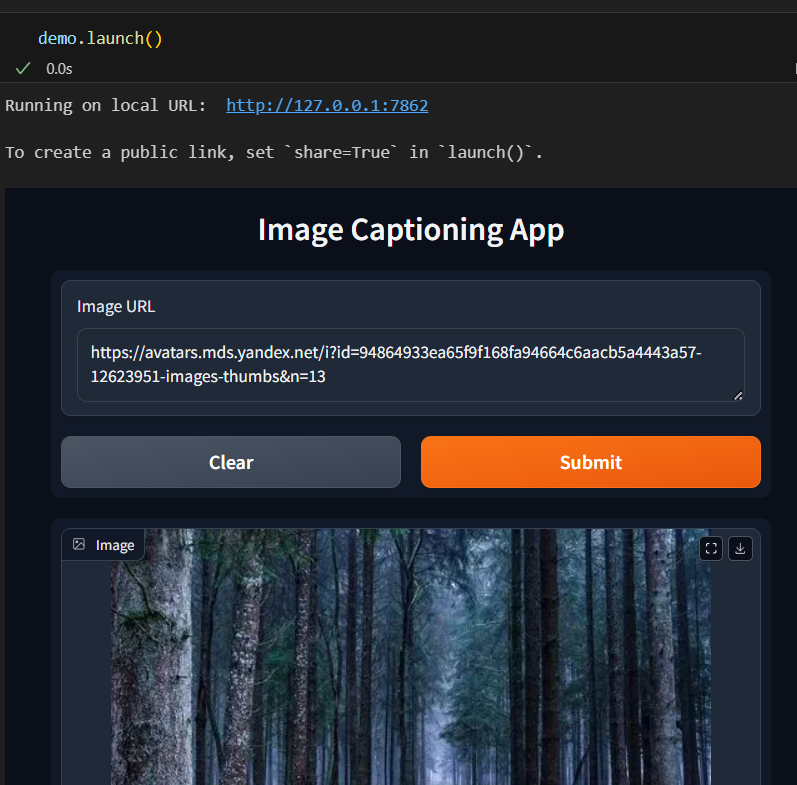

## Форма отчетности
В качестве отчета по практической работе вам необходимо предоставить:
1. Файл с кодом вашего приложения (Python Script или Jupyter Notebook)
2. Скриншот работы графического web-интерфейса вашего приложения

Отчет разместить на платформе дополнительного образования.